Explained Variance Score: 0.5543490479785935
Mean Squared Error: 8385.457585915015
R-squared: 0.5543255055349823


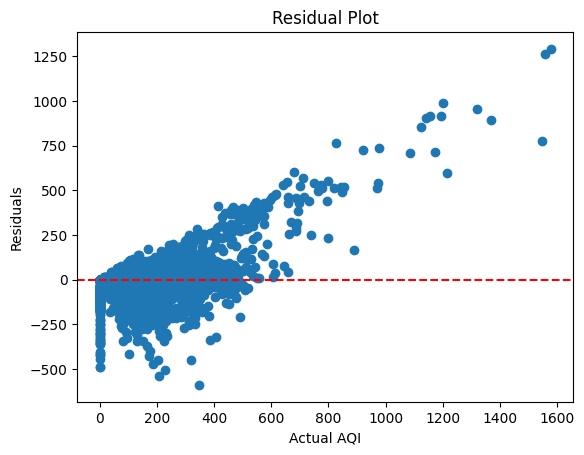

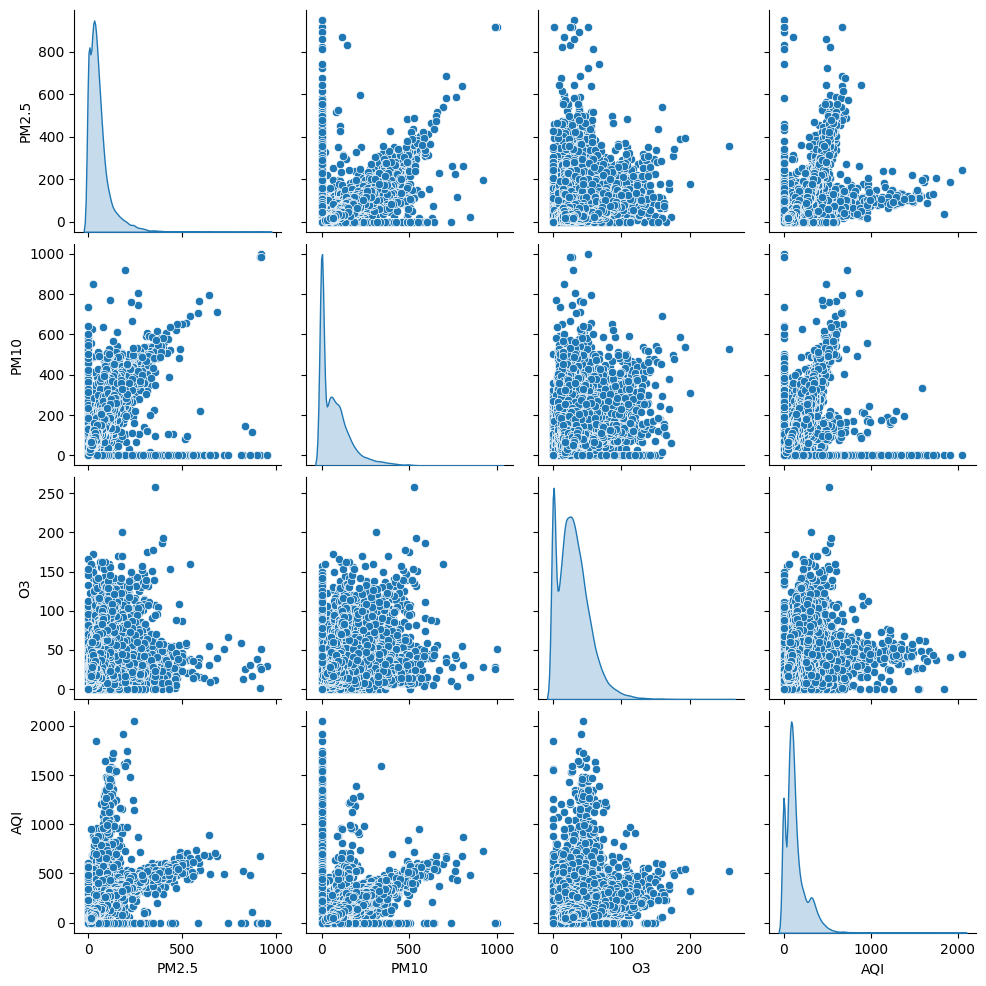

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score
# Load your dataset (replace 'your_dataset.csv' with the actual file name)
data = pd.read_csv('/content/city_day.csv')

# Assuming your dataset has columns like 'feature1', 'feature2', ..., 'AQI' where 'AQI' is the target variable
data.fillna(0, inplace=True)
X = data[['PM10','PM2.5','O3']]  # Features
y = data['AQI']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
evs = explained_variance_score(y_test, y_pred)
print(f'Explained Variance Score: {evs}')
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
#Residual plot
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel("Actual AQI")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()
#pairplot
sns.pairplot(data[['PM2.5', 'PM10', 'O3', 'AQI']], diag_kind='kde')
plt.show()

